**Akash Das - AI & Machine Learning**

**Problem Overview**

For this AI and Machine Learning project, I have decided to execute two prediction tasks - Regression (predicting songs’ popularity) and Classification (predicting songs’ genre) utilizing the “Spotify Tracks DB” dataset. The dataset link - https://shorturl.at/v3YTS

I will first start the project by loading and visualizing the complete data. Then, I will perform the necessary cleaning and execute features engineering after which I will split the entire data into training and testing data. Lastly, the split data having undergone processing will be used in the process of training and testing the models. Furthermore, for this project, I have chosen to integrate three regression models (Decision Trees with GridserachCV, Random Forest Regressor, and Gradient Boosting) and three classification models (Logistic Regression, KNN, and SVM).

Below are some of the reasons why I have decided to use Decision Trees, Random Forest Regression, and Gradient Boosting for the Regression task apart from the fact that all these models are extremely suited for the structured dataset:

**i. Decision Trees**

Decision Trees are quite simple to interpret and comprehensively understand without any ambiguity. This algorithm operates by partitioning the data into a number of subsets based on the feature values thereby helping us to visualize crucial features such as tempo, danceability, popularity, etc.
The popularity factor can be influenced by several parameters that we can consider as non-linear. They can be explained well by Decision Trees since the interactions are so intricate between the variables.

**ii. Random Forest Regressor**

Random Forests Regressor builds and develops multiple Decision Trees and integrates their estimations, making them less fragile, unlike a single Decision Tree. It helps go a long way in minimizing the overfitting issue which is characteristic of Decision Trees particularly when dealing with large sets of data.
As with any ensemble learning algorithms, Random Forests are not excessively inclined towards too much fine-tuning for their adequate prediction capabilities.

**iii. Gradient Boosting**

Unlike other methods, Gradient Boosting learns models iteratively, i.e. each successive model is constructed to minimise the prediction error of its predecessor. These changes implemented in a stepwise manner result in highly accurate predictions.
Additionally, we have Gradient Boosting capable of determining the required nonlinearity between the characteristics and the outcome variable.

Below are some of the reasons why I have decided to use Logistic Regression, KNN, and SVM models for the Classification task:

**i. Logistic Regression**

Logistic Regression gives a very good understanding of how features (e.g., tempo, loudness, energy) are related to the probability of the track being in a certain genre. The coefficients can reveal which features contribute to making a song belong to a specific genre.
Furthermore, with the help of the OvR (One-versus-rest) strategy, Logistic Regression can easily solve multi-class classification problems which makes it quite suitable for predicting multiple genres.

**ii. K-Nearest Neighbour (KNN)**

KNN is a non-parametric model which means that it doesn’t presume any particular distribution of the data. It operates by identifying what is referred to as the ‘closest’ songs (in relation to features similarity) and then categorizing the target song according to the majority genre of those neighbours. This is possible after genres tend to group together in the feature space.
Moreover, because KNN relies on local information for the classification, it is therefore quite capable of representing non-linear relations between features and genres. For instance, songs of similar acoustic characteristics may form a cluster group despite the data distribution being complex.

**iii. Support Vector Machines (SVM)**

Compared to our previous model KNN, SVM effectively works to develop the maximum distance between the two classes, thus making it more robust to outliers. As a result, SVM can proficiently mitigate the impact of noisy data on the process of genre identification.
Furthermore, SVM algorithms also propagate the usages of different modes of kernels such as linear, polynomial, and RBF to essentially capture the complex relationships between song features and genres.

**Step 1: Data Loading and Exploration**

This section deals with loading the dataset accompanied by initial exploration.


In [ ]:
#Importing Pandas & NumPy library
import pandas as pd
import numpy as np

# Loading the dataset ‘SpotifyFeatures.csv’ and reading it into a Pandas DataFrame (incorporating the file path)
df = pd.read_csv('/content/SpotifyFeatures.csv')

# Displaying basic information about the dataset such as columns, non-null counts, and datatypes
print(df.info())

# Extracting the statistical summary of the numerical columns
print(df.describe())

# Checking the first 10 rows of the dataset
print(df.head(10))

# Checking the last 10 rows of the dataset
print(df.tail(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

**Detailed Explanation**

**Libraries Import:** The code starts with importing the libraries that are relevant to the tasks. In this case, it imports Pandas for data handling and manipulation, and NumPy for the required numerical computations.

**Dataset Loading:** This comprises loading the downloaded data set ‘SpotifyFeatures.csv’ from Kaggle and then reading it into the Pandas DataFrame which is named ‘df’. The file path is also hardcoded, and the data is read using pd.read_csv.

**Dataset Information:** The df.info() function displays information about the dataset columns, non-null counts, and data types of the given dataset which creates an overview of the entire dataset structure. It also has the added advantage of giving out the missing value for any input as well as the datatypes for further investigation.

**Statistical Summary:** Using the function df.describe() we get the statistical description of numerical features such as mean, median, and minimum plus maximum values, revealing the distribution patterns of data containing outliers.
Data Preview: Applying the functions df.head( 10 ) and df.tail( 10 ), we get essential rows with data values and check the correctness of the loaded data.

**Step 2: Data Cleaning**

In this section, I will take care of any missing values and remove irrelevant columns from the dataset which are not at all required for our prediction tasks. I will also check for any issues related to duplicate data entries and remove them all.

In [ ]:
# Checking for all the missing values - In this dataset, we have one missing value in ‘track_name’ which is irrelevant as later we are going to remove the column
print(df.isnull().sum())

# Dropping irrelevant columns (‘artist_name’, 'track_id', 'track_name')
df_relevant = df.drop(columns=['artist_name', 'track_id', 'track_name'])

# Checking for duplicates and removing them
df_final = df_relevant.drop_duplicates()

# Checking if any duplicates were removed
print(f"df_relevant: {df_relevant.shape[0]} rows")
print(f"df_final: {df_final.shape[0]} rows")

# Displaying the processed and cleaned data ready for our prediction tasks
print(df_final.info())

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64
df_relevant: 232725 rows
df_final: 232641 rows
<class 'pandas.core.frame.DataFrame'>
Index: 232641 entries, 0 to 232724
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232641 non-null  object 
 1   popularity        232641 non-null  int64  
 2   acousticness      232641 non-null  float64
 3   danceability      232641 non-null  float64
 4   duration_ms       232641 non-null  int64  
 5   energy            232641 non-null  float64
 6   instrumentalness  232641 non-null  float64
 7   k

**Detailed Explanation**

**Missing Values Check:** df.isnull().sum() gives the missing values count for each feature. The only column having missing values is ‘track_name’ which is irrelevant to our prediction task and hence, dropped/removed.

**Dropping Irrelevant Columns:** The columns named ‘artist_name’, ‘track_id’, and ‘track_name’ are removed as they don’t contribute to our prediction tasks. The subsequent cleaned dataset is stored in df_relevant.

**Duplicates Removal:** df.drop_duplicates() drops duplicate row data in order to maintain its integrity. To check whether there were any duplicates that have been successfully deleted, the number of rows before and after the operation is subsequently printed.

**Step 3: Initial Visualization**

This step critically deals with the preliminary visualization of the DataFrame to get a richer understanding of the numerical features’ distribution along with their relevant relationships.

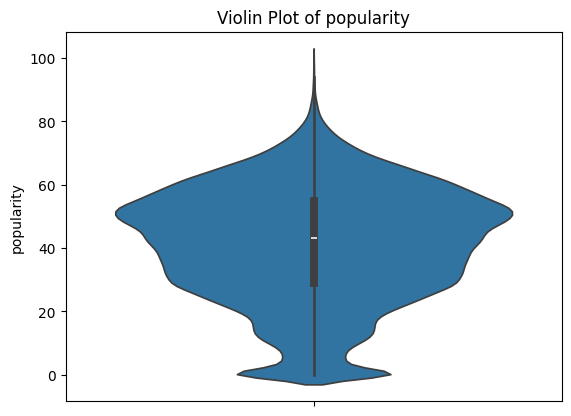

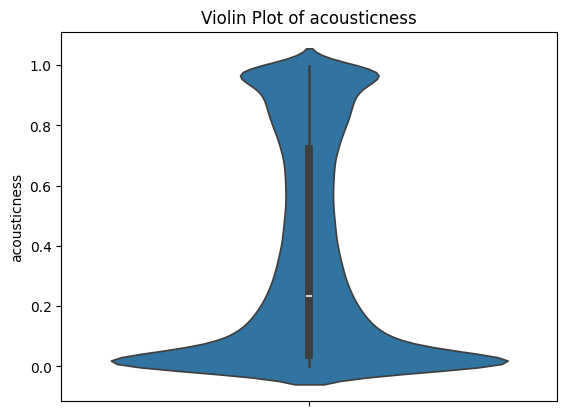

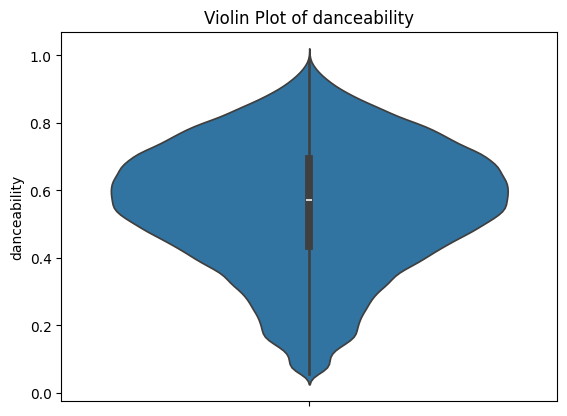

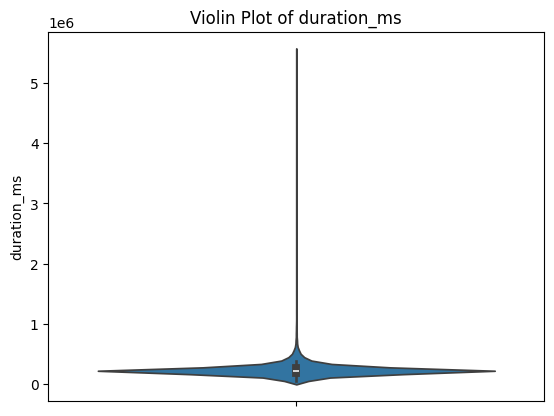

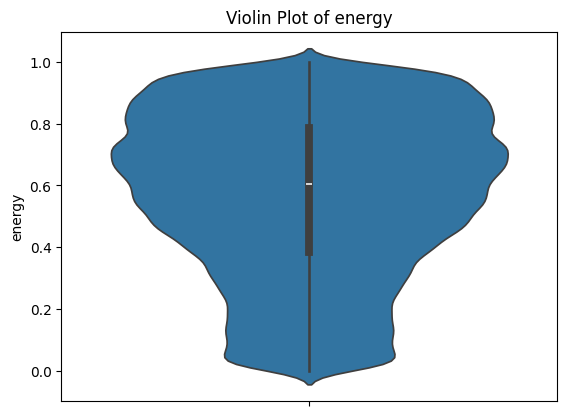

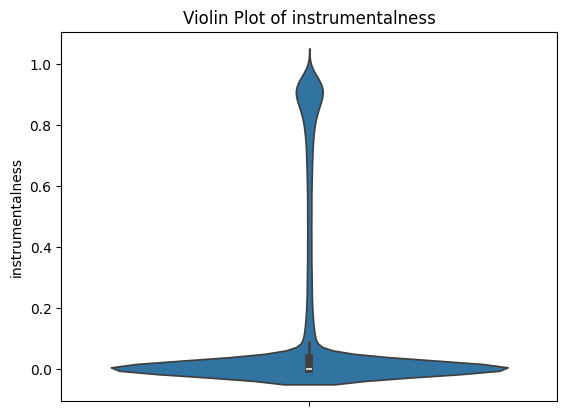

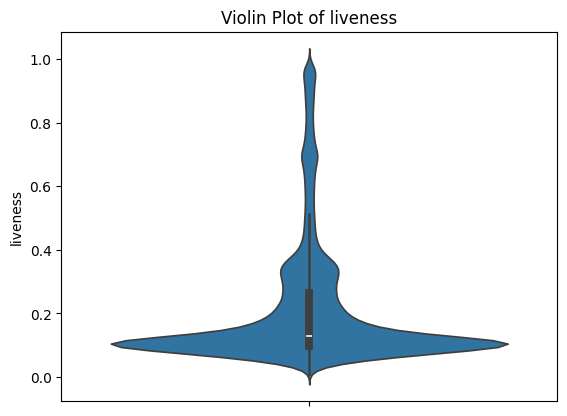

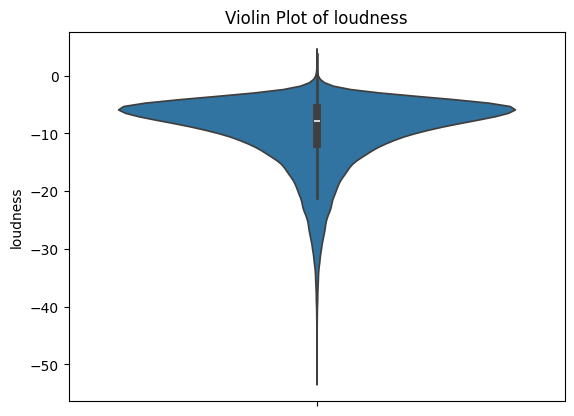

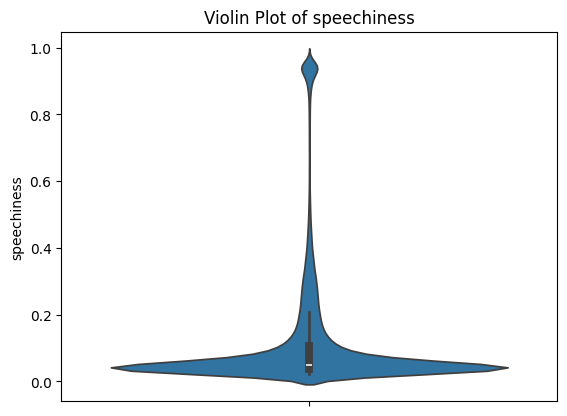

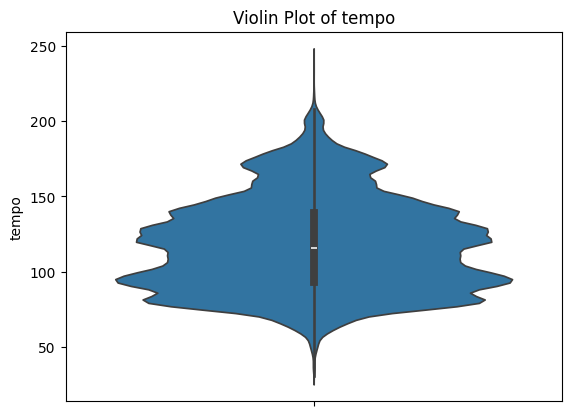

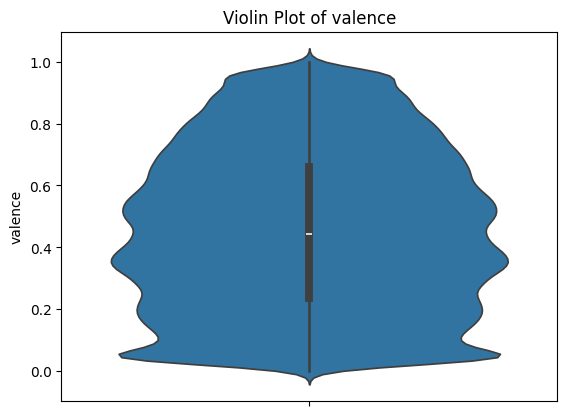

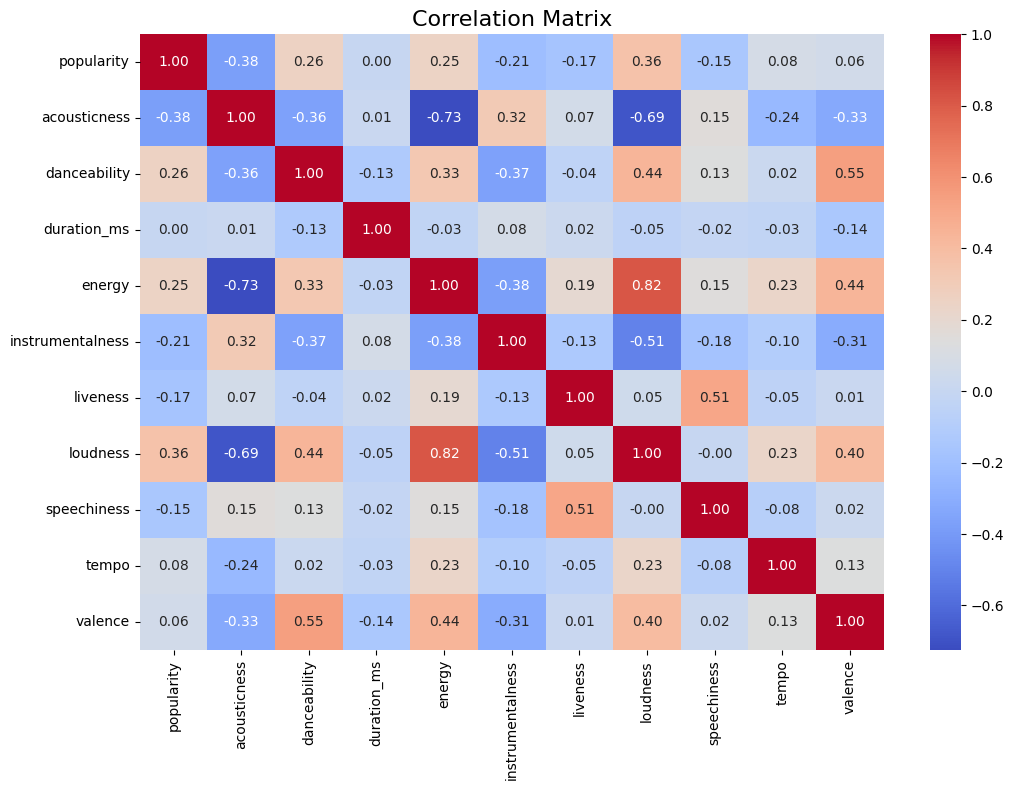

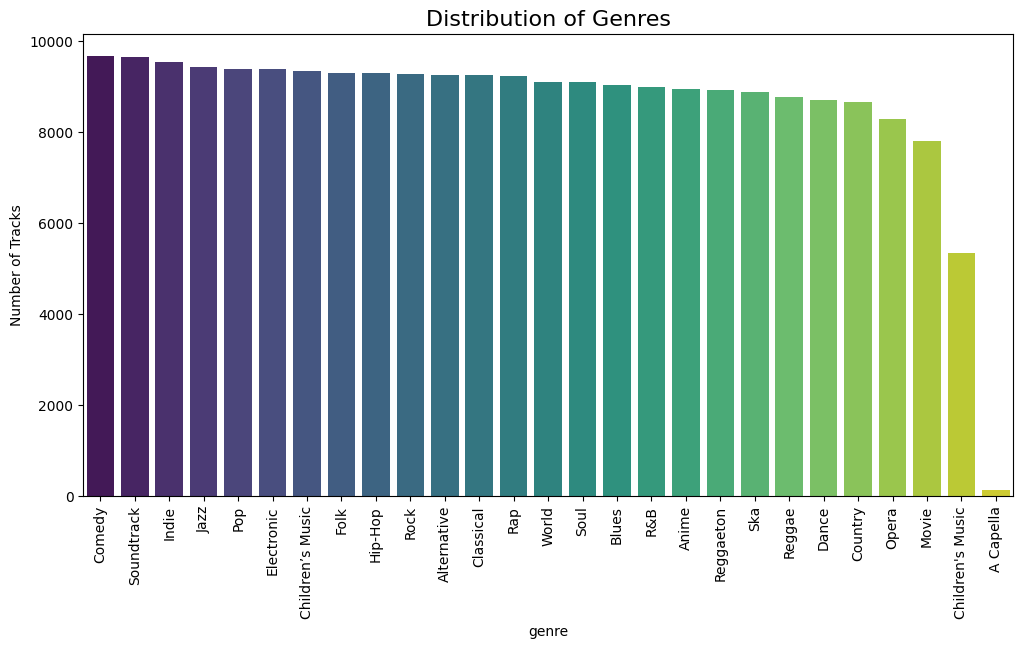

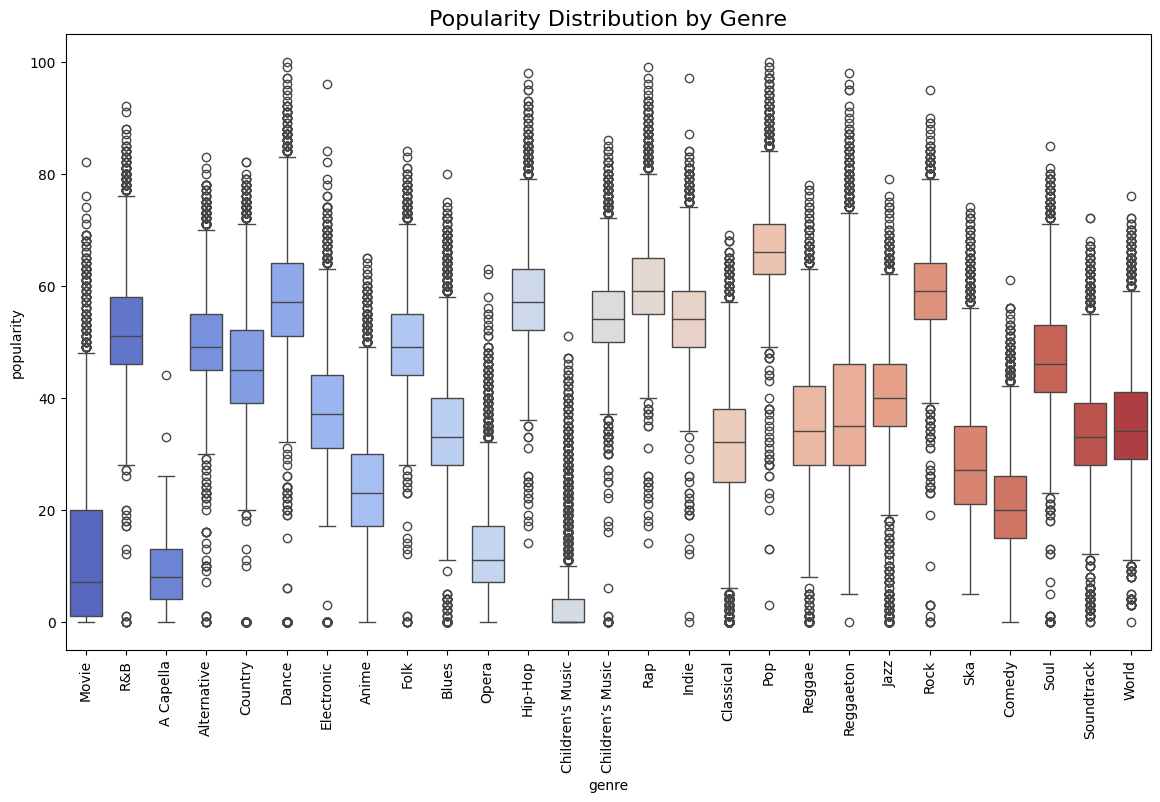

In [ ]:
#Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Getting numerical features to be used for the visualization
numerical_features_df = df_final.select_dtypes(include=['number']).columns

# Violin plots for the numerical features
for feature in numerical_features_df:
    sns.violinplot(y=df_final[feature])  # Creating violin plot for each feature
    plt.title(f"Violin Plot of {feature}")
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_final[numerical_features_df].corr(), annot=True, cmap='coolwarm', fmt='.2f') #Calculating the correlation matrix from the data frame (df_final) containing numerical data
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# Distribution of Genres
plt.figure(figsize=(12, 6))
genre_counts = df_final['genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, hue=genre_counts.index, palette='viridis', legend=False)
plt.title('Distribution of Genres', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Number of Tracks')
plt.show()

# Popularity by Genre
plt.figure(figsize=(14, 8))
sns.boxplot(x='genre', y='popularity', data=df_final, hue='genre', palette='coolwarm', legend=False)
plt.title('Popularity Distribution by Genre', fontsize=16)
plt.xticks(rotation=90)
plt.show()

**Detailed Explanation**

**Library Import:** For data visualization, both matplotlib.pyplot and seaborn libraries are imported.

**Violin Plots for Numerical Features:** The code successfully utilizes a ‘for’ loop to carefully create violin plots for all the calculated numerical features in the df_final data frame. They are specifically helpful in understanding the density plus distribution of data.

In violin plots, features of the kernel density plots are combined with the features of the Box plots for better visualization with regard to the data distribution of shape, central tendency, and variability which are discussed below.

**Interpretation:**

**Shape:** It involves a concise look at the distribution of the data points given by the width of the violin plot at a given value corresponding to the density. A wider section highlights a greater concentration of data.
Central Tendency: The white dot within the violin plot shows the median of the data.

**Variability:** The middle black bar within the violin plot shows the IQR (Interquartile Range) which consists of 50% of the overall data. The thin black lines diverging from the bar are known as whiskers that represent the range of the data excluding any possible outliers.

**Correlation Map (Heatmap):** To analyse the relationships between numerical features, a correlation matrix is calculated to identify their interdependencies. With seaborn, the heatmap of these correlations is made to identify the members that are strongly correlated which may affect our prediction task. Therefore, a correlation heatmap is a graphical representation of the correlation matrix. It employs colour as a means of identifying the quality and orientation of the associations between the numerical features of a data set.

**Interpretation:**

**Color:** The color of each and every cell present in the heatmap determines the strength and the direction of the correlation between two numerical features.

The darker red color represents a very strong and positive correlation between the features i.e. as one feature increases, the other one increases too.

The second type of relationship is represented by the darker shades of blue demonstrating a negative correlation between the features, i.e. one feature goes in the opposite direction to the other one.

Lastly, for lighter colors or white, the correlation is pretty negligible and non-existent.

**Annotation:** The annot=True argument adds the numerical values to every cell representing the exact correlation coefficient.

**Colormap:** The cmap parameter possessing the value of ‘coolwarm’ defines the colour scheme of the overall heatmap.

**Genre Distribution:** A bar plot shows the distribution of tracks for each genre, also reviewing the necessary genre imbalance in the dataset. The graph proves to be a very useful representation required for further analyses and is also quite self-explanatory.

**Popularity by Genre:** The box plot visualization made to track popularity by genre helps to understand the distribution of popularity into each and every genre and whether any of the genres are more or less popular often.
A box plot, also known as a box-and-whisker plot, is a graphical representation of the distribution of numerical data based on five summary statistics: Its measures are minimum, first quartile (Q1), mid or median value, third quartile (Q3), and maximum.

**Interpretation:**

**Box:** The box in the middle refers to the Interquartile range (IQR) and consists of fifty percent of the data it possesses. The lower side of the box is Q1, the upper side is Q3 and the line inside the box is median.

**Whiskers:** The solid lines extending out from the box are known as whiskers which refers to the range of the data but without the extremes. The lower whisker extends to 1.5 times of IQR below Q1 whereas the upper whisker extends to 1.5 times of IQR above Q3.

**Outliers:** Any data points beyond the whiskers are considered outliers and they get well captured by the Box plots.

**Step 4: Features Engineering**

We’ll now one-hot encode categorical variables (e.g., genre) and scale the numerical features to ensure models perform optimally.

In [ ]:
# Checking for all the categorical columns
categorical_cols = df_final.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

# Checking for all the numerical columns
numerical_cols = df_final.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)

# One-hot encoding of the categorical columns
df_encoded = pd.get_dummies(df_final, columns=['genre', 'key', 'mode', 'time_signature'], drop_first=True)

# Standardizing the numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Displaying the transformed dataset
print(df_encoded.head())

Index(['genre', 'key', 'mode', 'time_signature'], dtype='object')
Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')
   popularity  acousticness  danceability  duration_ms    energy  \
0   -2.263156      0.683468     -0.890726    -1.141490  1.286745   
1   -2.208146     -0.345390      0.192184    -0.822006  0.630109   
2   -2.098125      1.644675      0.585479    -0.545450 -1.670012   
3   -2.263156      0.942796     -1.693479    -0.695440 -0.929874   
4   -2.043115      1.639038     -1.203207    -1.282299 -1.313228   

   instrumentalness  liveness  loudness  speechiness     tempo  ...  key_E  \
0         -0.489669  0.660547  1.290531    -0.367987  1.595752  ...  False   
1         -0.489669 -0.322883  0.668553    -0.183117  1.823407  ...  False   
2         -0.489669 -0.564958 -0.718435    -0.455841 -0.588264  ...  False   
3         -0.489669

**Detailed Explanation**

**Categorical and Numerical Features:** The categorical as well as the numerical columns in the dataset are selected using select_dtypes(). This is a very important step to distinguish both the categorical and numerical columns before preprocessing methods like one hot encoding (categorical data) and standardization/scaling (numerical data).

**One-Hot Encoding:** The categorical columns such as ‘genre’, ‘key’, ‘mode’, and ‘time signature’ are one-hot encoded using the pd.get_dummies() function. This is executed to make sure that categorical variables can be fed into machine learning algorithms.

**Standardization:** To enhance the algorithm’s performance, especially the one depending on distance metrics such as Linear Regression and SVM, numerical columns are standardized and scaled by applying StandardScaler, which normalizes them to have mean 0 and variance 1.

**Step 5: Train/Test Split for Regression and Classification**

In [ ]:
# Necessary Importing
from sklearn.model_selection import train_test_split

# Splitting for regression (target: popularity)
X_reg = df_encoded.drop(columns=['popularity'])
y_reg = df_encoded['popularity']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=123)

# Splitting for classification (example: target: genre_Rock)
X_clf = df_encoded.drop(columns=['genre_Rock'])  # Use the genre columns for classification
y_clf = df_encoded['genre_Rock']
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=123)

**Detailed Explanation**

We split the dataset into training and testing sets for both the regression (predicting song popularity) and classification (predicting song genre) tasks. This is specifically accomplished by incorporating 80% of data for training and 20% for testing the models, thus facilitating the models with two types of data (training data to learn from and testing data to be evaluated on). For regression, the target variable is popularity, and for classification, we choose one of the genre columns i.e. the genre ‘Rock’.

**Splitting Data for Regression:** Features for regression are utilized by excluding the target which is ‘popularity’ while using train_test_split() to divide data into the training and testing sets. The training set will be employed for accurate modelling, and the performance/accuracy of the model will be measured using the testing set.

**Splitting Data for Classification:** For classification, the ‘genre_Rock’ is taken as the label, and the data is split into training and testing sets like previously done in the case of Regression. This is, therefore, a binary classification problem in which we make our primary decision to predict whether a given track is within the rock genre.

**Step 6: Model Training and Evaluation**

**i. Regression**

In [ ]:
# Import necessary libraries for regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error, r2_score

# Decision Tree Model with GridSearchCV for hyperparameter tuning
dt = DecisionTreeRegressor(random_state=123)
param_grid_dt = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20]}
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_dt.fit(X_train_reg, y_train_reg)
y_pred_dt = grid_dt.predict(X_test_reg)
print("Decision Tree - Best Params:", grid_dt.best_params_)
print("Decision Tree - RMSE:", root_mean_squared_error(y_test_reg, y_pred_dt))
print("Decision Tree - R² Score:", r2_score(y_test_reg, y_pred_dt))

# Random Forest model
rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=123, bootstrap=True)
rf.fit(X_train_reg, y_train_reg)
y_pred_rf = rf.predict(X_test_reg)
print("Random Forest - RMSE:", root_mean_squared_error(y_test_reg, y_pred_rf))
print("Random Forest - R² Score:", r2_score(y_test_reg, y_pred_rf))

# Gradient Boosting Model
gbr = GradientBoostingRegressor(random_state=123)
gbr.fit(X_train_reg, y_train_reg)
y_pred_gbr = gbr.predict(X_test_reg)
print("Gradient Boosting Regression RMSE:", root_mean_squared_error(y_test_reg, y_pred_gbr))
print("Gradient Boosting Regression R² score:", r2_score(y_test_reg, y_pred_gbr))


Decision Tree - Best Params: {'max_depth': 20, 'min_samples_split': 20}
Decision Tree - RMSE: 0.5683036936880539
Decision Tree - R² Score: 0.6790771929902515
Random Forest - RMSE: 0.5151164848925127
Random Forest - R² Score: 0.7363361910546113
Gradient Boosting Regression RMSE: 0.546578453402162
Gradient Boosting Regression R² score: 0.7031448145640482


**Detailed Explanation**

**Decision Tree with GridSearchCV:** A DecisionTreeRegressor is incorporated, which is trained with the hyperparameter tuning via GridSearchCV. It is applied to test different values of parameters such as max_depth and min_samples_split to determine the best tree configuration. Model performance is quantified by using root mean squared error and the coefficient of determination (R²).

**Random Forest Regression:** To further increase the overall accuracy, a RandomForestRegressor is trained to build multiple decision trees and then the average of all the predictions is calculated. Like Decision Trees, RMSE and R² are used in order to evaluate the performance of the model.

**Gradient Boosting:** GradientBoostingRegressor is yet another approach classified as an ensemble method. It builds trees sequentially, where the new estimator tries to minimize the errors made by the previous one. The performance of this model is also determined by the means of RMSE and R².

**ii. Classification**

In [ ]:
# Import necessary libraries for classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression Model
log_reg = LogisticRegression(random_state=123, max_iter=500)
log_reg.fit(X_train_clf, y_train_clf)
y_pred_log_reg = log_reg.predict(X_test_clf)
print("Logistic Regression - Accuracy:", accuracy_score(y_test_clf, y_pred_log_reg))
print(classification_report(y_test_clf, y_pred_log_reg))

# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)  # Using default 5 neighbors
knn.fit(X_train_clf, y_train_clf)
y_pred_knn = knn.predict(X_test_clf)
print("KNN - Accuracy:", accuracy_score(y_test_clf, y_pred_knn))
print(classification_report(y_test_clf, y_pred_knn))

# SVM Model
svm = SVC(kernel='linear')  # Using linear kernel
svm.fit(X_train_clf, y_train_clf)
y_pred_svm = svm.predict(X_test_clf)
print("SVM - Accuracy:", accuracy_score(y_test_clf, y_pred_svm))
print(classification_report(y_test_clf, y_pred_svm))

Logistic Regression - Accuracy: 0.9999355240817555
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     44658
        True       1.00      1.00      1.00      1871

    accuracy                           1.00     46529
   macro avg       1.00      1.00      1.00     46529
weighted avg       1.00      1.00      1.00     46529

KNN - Accuracy: 0.980377828880913
              precision    recall  f1-score   support

       False       0.99      0.99      0.99     44658
        True       0.79      0.69      0.74      1871

    accuracy                           0.98     46529
   macro avg       0.89      0.84      0.86     46529
weighted avg       0.98      0.98      0.98     46529

SVM - Accuracy: 0.9999355240817555
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     44658
        True       1.00      1.00      1.00      1871

    accuracy                           1.00     46529
   macro

**Detailed Explanation**

**Logistic Regression:** For classification, LogisticRegression() is used where the target that falls under binary classification (Rock vs non-rock) is predicted. The evaluation of the model is based on an accuracy score and a classification report with the values of precision, recall, and F1 measures.

**K-Nearest Neighbors (KNN):** In this case, a KNeighborsClassifier is trained with the default of 5 neighbors. KNN implements the label prediction of a particular data point by analysing the labels of its closest neighbours and capturing the most frequent one. The two principal evaluation modes incorporated are the Accuracy and Classification report.

**Support Vector Machine (SVM):** The use of Linear Kernel in SVM is applied to classify tracks. According to the model, data points are separated into different classes by hyperplanes after which it generates the accuracy score along with the necessary classification report to assess the performance of SVM.

**Model Performance & Final Conclusion**

**i. Regression**

In order to understand the performance of the regression models, we need to first be equipped with the concepts of RMSE (Root Mean Squared Error) and R² (Coefficient of Determination) Score. These two metrics play a critical role in interpreting the performance of the regression models.

**RMSE:** It basically determines the differences between the model’s predicted and the actual values. Hence, lower values of RMSE are better for the model because the values given by the model are way closer to the actual values.

**R² Score:** This is responsible for stating the model’s accountability for the variance of the target variable. A better score is nearer to 1, because it indicates that the model illustrates more of the variance making it more accurate.

Now, let’s analyze the performance of each regression model performing pretty well for the regression task.

**Decision Tree (with GridsearchCV)**

Best Parameters: max_depth = 20, min_samples_split = 20
RMSE: 0.5683 and R² Score: 0.6791

The Decision tree model has a strong performance depicting an R² score of 0.679 stating that about 68% of the variance in song popularity is explained by the model. Also, it has an RMSE of 0.5683 which means that on average its predictions vary from the actual values by 0.57 units. The result of this model’s performance is fairly strong, but still not enough to outcompete the other models.

**Random Forest**

RMSE: 0.5151 R² Score: 0.7363

Out of the three models used, Random Forrest is the clear winner in terms of RMSE and R² score. The RMSE of this model is as low as 0.5151 suggesting that its predictions vary only by 0.51 units from the actual values and hence, the most accurate tested model. It even earns the highest R² value of 0.736, meaning that it can account for 73.6% of the variation in the target variable out of the total regression models used.

**Gradient Boosting**

RMSE: 0.5466 R² Score: 0.7031

Gradient Boosting also proves to be performing well generating RMSE of 0.5466 and R² score of 0.7031. It performs better than Decision Tree, but it slightly falls behind Random Forest on both criteria.

**Conclusion: Optimal Model for Regression**

I found that among all the tested models above, the Random Forest Regressor seemed to be the most optimal model for predicting song popularity from this dataset. This one not only has exceptionally the lowest RMSE of 0.5151, but also the highest value of R² which is 0.736.

It should be critically noted that estimating/predicting a song’s popularity is a rather complex undertaking due to the fact that several unpredictable factors significantly impact this criterion. These factors include - Social market trends, marketing strategies on music, business psychology and its influence, etc. Hence, accomplishing a very high R2 score (0.8-1.0) is not always so realistic.

**ii. Classification**

Let's interpret the classification results for our three chosen models: Logistic Regression, K Nearest Neighbors (KNN), and Support Vector Machine (SVM). We'll consider the following key metrics to evaluate the models: Accuracy, Precision, Recall, and F1 score.

**Logistic Regression**

Accuracy: 0.9999 (99.99%)
Precision, Recall, and F1-Score (for both classes: True & False): All metrics are 1.00 (Perfect score).

**Interpretation**

Logistic Regression is doing extremely well with an accuracy that is at 99.99% which is nearly perfect. The precision which means how many predicted positives are actually correct and Recall which means how many actual positives are correctly predicted are both perfect 1.0 for both the classes (True and False). The F1-Score responsible for generating the average of precision and recall is also a perfect 1.00 stating that the model handles both the classes equally well. As a result, the overall performance shows that the model is able to predict the genre correctly for both the majority class (False) and minority class (True) with negligible mistakes.

**K-Nearest Neighbors (KNN)**

Accuracy: 0.9804 (98.04%)
Precision - False: 0.99 and True: 0.79, Recall - False: 0.99 and True: 0.69, F1-Score - False: 0.99 and True: 0.74

**Interpretation**

KNN performs quite well with a near-perfect accuracy of 98.04%. For the False class, KNN yields excellent results with very high precision and recall both at 0.99. However, when it comes to True class, the performance is much lower because the precision is 0.79. This means that when it comes to True predictions only 79% of them are correct. Moreover, the recall is 0.69, which shows that not all true cases were identified as only 69% were recognized as true. The F1-Score of KNN for True class equals 0.74 suggesting that KNN struggles to perform on this minority class as compared to Logistic Regression and SVM.

**Support Vector Machine**

Accuracy: 0.9999 (99.99%)
Precision, Recall, and F1-Score - True & False: All are 1.00 (Perfect Score).

**Interpretation**

Like Logistic Regression, SVM also has a near-perfect accuracy of 99.99% and outputs a perfect score of 1.0 for Precision, Recall, and F1 Score for both the False and True classes. This implies that the classification errors for this model are absolutely negligible.

**Conclusion: Optimal Model for Classification**

The performance for both Logistic Regression and SVM are nearly identical with an accuracy score of 99.99%, accompanied by perfect precision, recall, and F1 scores. Both models have demonstrated exceptional performances making them the optimal models for the classification task.

Therefore, either, Logistic Regression or SVM would be the ideal model for this type of classification since they both fit the classification problem very well. Comparing both, SVM in general, is slightly better for handling complex decision boundaries.
